In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import cmath

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['lines.linewidth'] = 2
plt.rcParams.update({'font.size': 16})

# Lorenz 63 System

Simulate the classic chaotic dynamical system 

$$
\begin{align*}
\dot{x} &= \sigma (-x + y)\\
\dot{y} &= rx - y - xz \\
\dot{z} &= xy - bz
\end{align*}
$$

where $\sigma$, $r$ and $b$ are positive dimensionless constants.  Given values of $b$ and $\sigma$, chaos should ensure if $r> r_c$, where

$$
r_c = \sigma\left(\frac{\sigma + b + 3}{\sigma - b -1}\right)
$$

In [2]:
def f(X, t):
    x, y, z = X  
    return sigma * (y - x), x * (r - z) - y, x * y - b * z  # Derivatives


In [3]:
r = 28.0
sigma = 10.0
b  = 8.0 / 3.0

X0 = [1.0, 1.0, 1.0]  # initial vector X0 = [x(0), y(0), z(0)]

t = np.arange(0.0, 40.0, 0.01)

X = odeint(f, X0, t)



In the following cells, we explore the stability of the fixed point at the origin. The Jacobian is:
$$
J(0,0,0) = \begin{bmatrix}
-\sigma & \sigma & 0\\
r & -1 & 0\\
0 & 0 & -b
\end{bmatrix}, \text{ eigenvalues are roots of } \lambda^3 + (\sigma+1+b)\lambda^2 + (b(\sigma+1)+\sigma(1-r))\lambda + b\sigma(1-r)=0.
$$


In [4]:
def fpeigs0(sigma,b,r):
    # Compute eigenvalues for the origin
    coef = [1, sigma+1+b, sigma*(1-r)+b*(sigma+1), b*sigma*(1-r)]
    return np.roots(coef)

Then, one can visualize the eigenvalues as functions of $r$, given $\sigma=10$ and $b=8/3$:

Text(0, 0.5, 'eigenvalues')

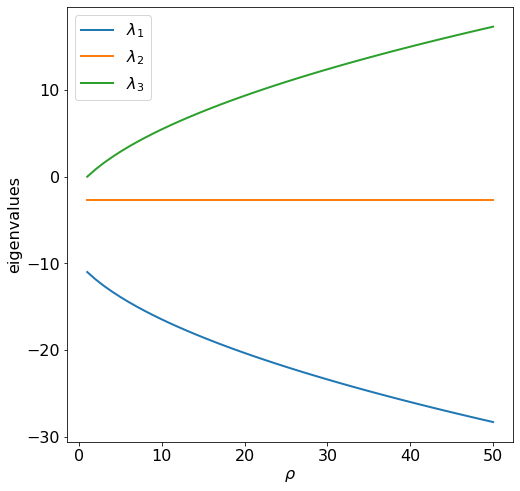

In [5]:
rgrid = np.linspace(1,50,50)
eigs1=[0]*50
eigs2 = [0]*50 
eigs3 = [0]*50
for i in range(0,50):
    eigs1[i], eigs2[i], eigs3[i] = np.sort(fpeigs0(sigma,b,rgrid[i]))
plt.plot(rgrid,eigs1,label=r'$\lambda_1$')
plt.plot(rgrid,eigs2,label=r'$\lambda_2$')
plt.plot(rgrid,eigs3,label=r'$\lambda_3$')
plt.legend()
plt.xlabel(r'$\rho$')
plt.ylabel('eigenvalues')

The eigenvalues above are sorted, with $\lambda$ indicating the smallest and $\lambda_3$ the largest. Recall that the solution is approximately:
$$
C_1 \exp (\lambda_1 t) + C_2 \exp ( \lambda_2 t) + C_3 \exp (\lambda_3 t)\sim O( \exp ( \lambda_3 t) ), \text{ since the exponential function with the largest eigenvalue is dominant in growth.}
$$

Therefore, we can guess: if we do a little perturbation in the initial condition, and define a function $\delta(t)$ as the norm from the fixed point:
$$
X(0) = [\epsilon, \epsilon, \epsilon],\quad \delta (t) = || X(t) - [0,0,0] ||_2 = \sqrt{ x(t)^2 + y(t)^2+z(t)^2 }  ,
$$
then $\delta (t) $ will also grow exponentially with rate approximately $\exp (\lambda_3t)$.

We are doing the check in the following cell:

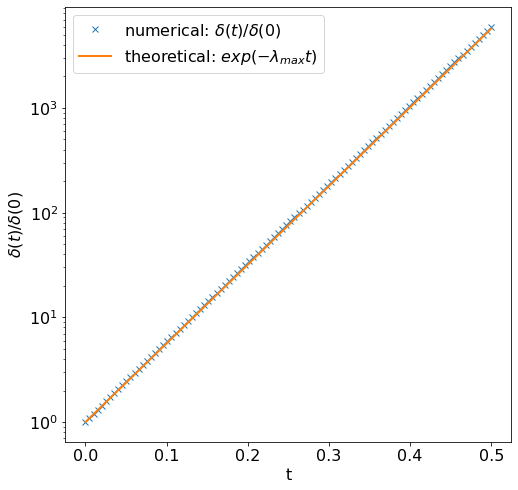

In [6]:
x0 = [0,0,0] # fixed point at the origin
xp = [1E-4]*3 # initial condition with perturbation 0.001
r = 50 # large r makes sure that the eigenvalues are very far apart and the approximation is more accurate.
t = np.linspace(0.0, 0.5, 100)

X = odeint(f,x0, t)
XP = odeint(f,xp, t)
deltaX = [0]*t.shape[0]
for i in range(0,t.shape[0]):
    deltaX[i] = np.linalg.norm(X[i] - XP[i])
    
plt.semilogy(t,deltaX/deltaX[0],'x',label = r'numerical: $\delta (t) / \delta (0)$')
plt.semilogy(t,np.exp(eigs3[np.int(r)-1]*t),label = r'theoretical: $exp(-\lambda_{max}t)$')
plt.xlabel(r't')
plt.ylabel(r'$\delta (t) / \delta (0)$')
plt.legend()
plt.show()

They do agree graphically. More quantitatively, we can do a linear regression between $\log \delta(t)/\delta(0)$ and $t$, and compare the coefficient with the eigenvalue. They also agree quite well!

In [7]:
np.polyfit(t,np.log(deltaX),1)[0] # coefficient via regression

17.343263181010723

In [8]:
eigs3[np.int(r)-1] # eigenvalue

17.30898945591409

In the next cell, we check the eigenvalues at the nonzero fixed points:

In [9]:
def fpeigs(sigma, b, r):
    # Compute eigenvalues for the two FPs X2, X3 (not the FP at the origin) for L63
    a0 = sigma+b+1
    a1 = b*(r+sigma)
    a2 = 2*sigma*b*(r-1)
    coef = [1, a0, a1, a2]
    
    return np.roots(coef)
def rc(sigma, b):
    # critical r_c.  r > r_c is chaotic
    return sigma*((sigma+b+3)/(sigma-b-1))

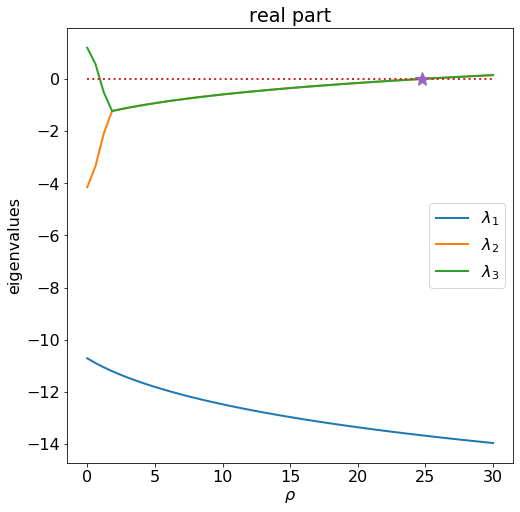

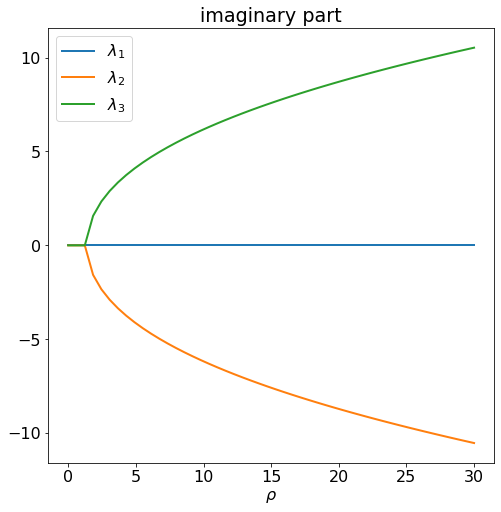

In [10]:
rgrid = np.linspace(0,30,50)
eigs1=[0]*50
eigs2 = [0]*50 
eigs3 = [0]*50
for i in range(0,50):
    eigs1[i], eigs2[i], eigs3[i] = np.sort(fpeigs(sigma,b,rgrid[i]))
eigs1 = np.asarray(eigs1)
eigs2 = np.asarray(eigs2)
eigs3 = np.asarray(eigs3)

#plt.subplot(1,2,1)
plt.plot(rgrid,eigs1.real,label=r'$\lambda_1$')
plt.plot(rgrid,eigs2.real,label=r'$\lambda_2$')
plt.plot(rgrid,eigs3.real,label=r'$\lambda_3$')
plt.plot(rgrid,0*rgrid,':')
plt.plot(rc(sigma,b),0,'*',markersize=15)
plt.legend()
plt.xlabel(r'$\rho$')
plt.ylabel('eigenvalues')
plt.title('real part')
plt.show()

#plt.subplot(1,2,2)
plt.plot(rgrid,eigs1.imag,label=r'$\lambda_1$')
plt.plot(rgrid,eigs2.imag,label=r'$\lambda_2$')
plt.plot(rgrid,eigs3.imag,label=r'$\lambda_3$')
plt.legend()
plt.xlabel(r'$\rho$')
#plt.ylabel('eigenvalues')
plt.title('imaginary part')
plt.show()

Homework 8 problem 4: estimate Lyapunov exponent of Lorenz 63 system:

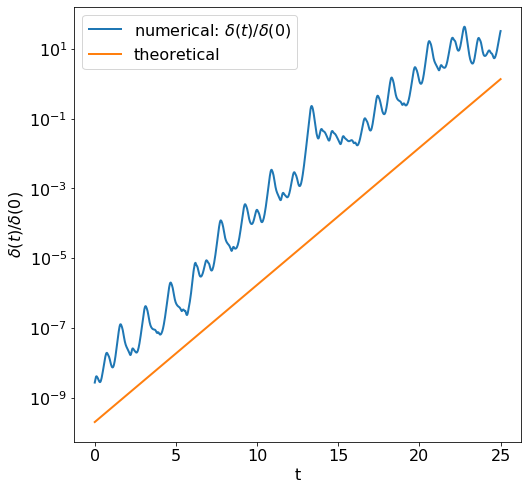

In [4]:
N = 1000
r = 28
slope = 0
for i in range(0,N):
    x0 = 15+np.random.randn(1,3)[0] # fixed point at the origin
    xp = x0+1E-9*np.random.randn(1,3)[0] # initial condition with perturbation 0.001
    #xp = x0
    
    t = np.linspace(0.0, 25, 1000)

    X = odeint(f,x0, t)
    XP = odeint(f,xp, t)
    deltaX = [0]*t.shape[0]
    for i in range(0,t.shape[0]):
        deltaX[i] = np.sqrt( (X[i][0] - XP[i][0])**2 + (X[i][1] - XP[i][1])**2 + (X[i][2] - XP[i][2])**2)
    slope = slope + np.polyfit(t,np.log(deltaX/deltaX[0]),1)[0]
slope = slope/N
    
plt.semilogy(t,deltaX,label = r'numerical: $\delta (t) / \delta (0)$')
plt.semilogy(t,.2*1E-9*np.exp(0.9056*t),label = r'theoretical')
plt.xlabel(r't')
plt.ylabel(r'$\delta (t) / \delta (0)$')
plt.legend()
plt.show()

In [12]:
np.polyfit(t,np.log(deltaX/deltaX[0]),1)

array([ 0.88838898, -0.87599747])

In [5]:
slope

0.9154279850229868

Homework 3: collect local maxima in $z$ and plot $z_{n+1}$ as a function of $z_n$

In [6]:

#maximum of z
T = 1000
N = 100*T
x0 = 15+np.random.randn(1,3)[0] 
t = np.linspace(0.0, T, N)
X = odeint(f,x0, t)
z = [X[i][2] for i in range(N)]

In [7]:
zmax = []
for i in range(0,N):
    if i>1 and i < N-1 and z[i]>z[i-1] and z[i]>z[i+1]:
        zmax = zmax + [z[i]]

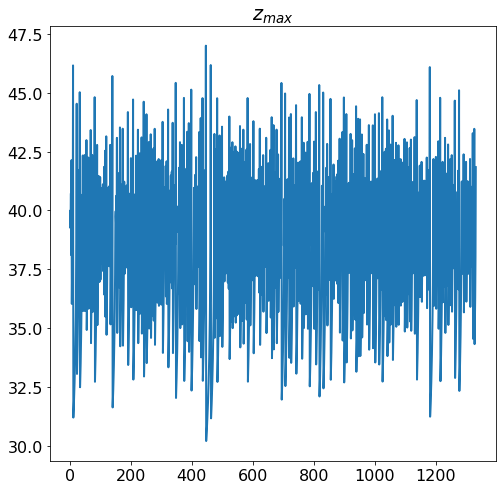

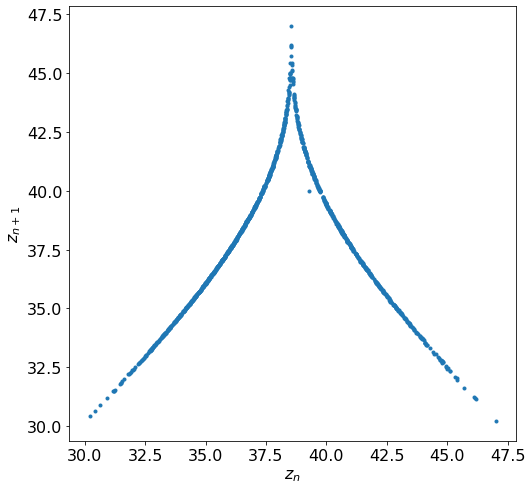

In [8]:
plt.plot(zmax)
plt.title(r'$z_{max}$')
plt.show()

plt.plot(zmax[0:np.shape(zmax)[0]-1],zmax[1:np.shape(zmax)[0]],'.')
plt.xlabel(r'$z_n$')
plt.ylabel(r'$z_{n+1}$')
plt.show()

In [9]:
np.shape(zmax)

(1333,)

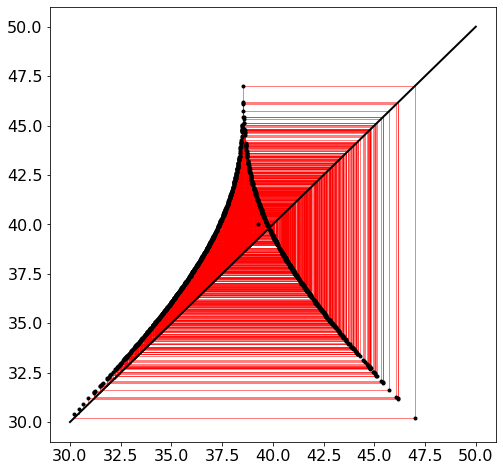

In [11]:
#plt.plot([30,50],[30,50],'k-')
for i in range(np.shape(zmax)[0]-1):
    plt.plot([zmax[i],zmax[i]],[zmax[i],zmax[i+1]],'r',linewidth=0.5)
    plt.plot([zmax[i],zmax[i+1]], [zmax[i+1],zmax[i+1]],'r',linewidth=0.5)
plt.plot([30,50],[30,50],'k-')
plt.plot(zmax[0:np.shape(zmax)[0]-1],zmax[1:np.shape(zmax)[0]],'k.')